# Russian Troll Tweets: Data Cleaning

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
import string
import datetime

from wordcloud import WordCloud
from nltk import FreqDist

# for text segmenting
# from ekphrasis.classes.segmenter import Segmenter
# seg_tw = Segmenter(corpus="twitter")

from preprocessing_funcs import *

In [14]:
raw_df = pd.read_csv('../data_files/tweets.csv.zip')

In [15]:
raw_df.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN


In [4]:
# Get date information
raw_df['date'] = pd.to_datetime(raw_df['created_str']).dt.date

start_date = min(raw_df.date)
end_date = max(raw_df.date)
time_delta_years = (max(raw_df.date) - min(raw_df.date)).days / 365

print(f'Data date range: {start_date} to {end_date}')
print(f'Time period: {time_delta_years:.2f} years')

Data date range: 2014-07-14 to 2017-09-26
Time period: 3.21 years


In [5]:
num_users = len(raw_df.user_key.unique())
num_tweets = len(raw_df)

print(f'Number of unique users: {num_users}')
print(f'Number of Tweets: {num_tweets}\n')
print(f'Average Tweets per User: {num_tweets/num_users:.2f}')
print(f'Average Tweet per User per Day: {(num_tweets/num_users)/(time_delta_years*365):.2f}')
print(f'Average Tweet per User per Week: {(num_tweets/num_users)/(time_delta_years*52):.2f}')
print(f'Average Tweet per User per Month: {(num_tweets/num_users)/(time_delta_years*12):.2f}')
print(f'Average Tweet per User per Year: {(num_tweets/num_users)/(time_delta_years):.2f}')

Number of unique users: 454
Number of Tweets: 203482

Average Tweets per User: 448.20
Average Tweet per User per Day: 0.38
Average Tweet per User per Week: 2.69
Average Tweet per User per Month: 11.65
Average Tweet per User per Year: 139.82


# Just *CLEAN* Tweets!

In [16]:
df = raw_df[['user_key', 'text']].astype(str)

In [17]:
df['hashtags'] = df['text'].map(get_hashtags)

In [18]:
df['text'] = df.text.map(clean_tweet)

In [19]:
df.head()

,user_key,text,hashtags
0,ryanmaxwell_1,islamkills are you trying to say that there we...,[IslamKills]
1,detroitdailynew,clinton trump should’ve apologized more attack...,[]
2,cookncooks,who was is the best president of the past year...,[]
3,queenofthewo,i don t have to guess your religion christmasa...,[ChristmasAftermath]
4,mrclydepratt,pence and his lawyers decided which of his off...,[]


## Word Clouds

### Most frequent tweeters

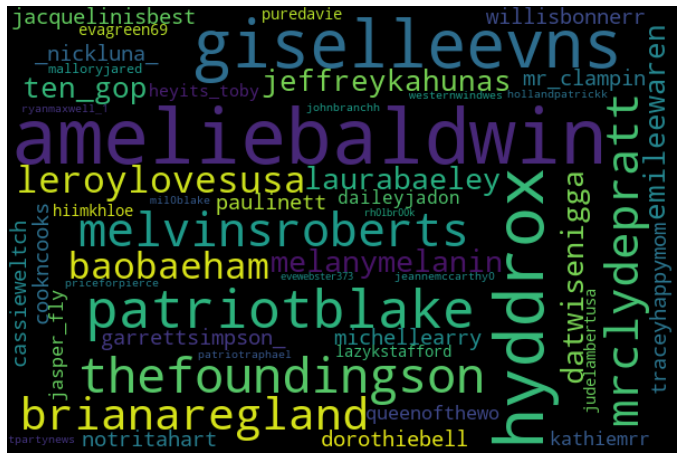

In [26]:
fdist = FreqDist(df['user_key'])

wc = WordCloud(width=600, height=400, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Most used hashtags in dataset

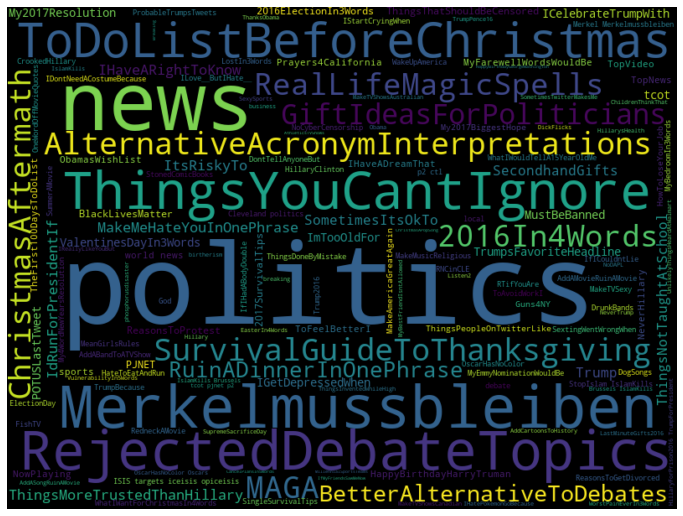

In [28]:
fdist = FreqDist(df['hashtags'].apply(lambda x: " ".join(x)))

wc = WordCloud(width=800, height=600, max_words=150).generate_from_frequencies(fdist)
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Merkelmussbleiben = 'Merkel must stay'

In [ ]:
# df.to_csv('data_files/clean_tweets.zip', index=False)